In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [2]:
import numpy as np 
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])
A.shape

(6, 2)

In [3]:
df = pd.DataFrame(A , columns=['A','B'])

In [4]:
df

,A,B
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [5]:
pd.DataFrame(df.A.value_counts(normalize = True)*100 )

,A
-4,33.333333
3,16.666667
7,16.666667
1,16.666667
-3,16.666667


In [6]:
df = pd.read_csv('winequality-red.csv')
print(df.shape)
df

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df = df.drop(columns=['quality' ] , axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(1599, 11)

In [10]:
df1  = pd.DataFrame(df_scaled)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [11]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,7.700046e-17,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [13]:
pca.fit_transform(df1)

array([[-1.61952988,  0.45095009],
       [-0.79916993,  1.85655306],
       [-0.74847909,  0.88203886],
       ...,
       [-1.45612897,  0.31174559],
       [-2.27051793,  0.97979111],
       [-0.42697475, -0.53669021]])

In [14]:
df1

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [15]:
import matplotlib.pyplot as plt
pca = PCA()

In [16]:
principal_component = pca.fit_transform(df1)

Text(0, 0.5, 'eVR')

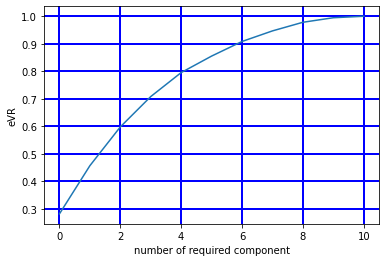

In [17]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(color='b', linestyle='-', linewidth=2)
plt.xlabel("number of required component")
plt.ylabel("eVR")

##  DECISION TREE  + PRINCIPAL OF COMPONENT ANALYSIS: -

In [18]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
x = data.drop(["quality"], axis=1)
y = data['quality']
print('x - SHAPE  : - -', x.shape)
print('y - SHAPE  : - -', y.shape)

x - SHAPE  : - - (1599, 11)
y - SHAPE  : - - (1599,)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x , y ,test_size=0.2, random_state=42)
print("x_train SHAPE",x_train.shape)
print("x_test SHAPE",x_test.shape)
print("y_train SHAPE", y_train.shape)
print("y_test  SHAPE", y_test.shape)

x_train SHAPE (1279, 11)
x_test SHAPE (320, 11)
y_train SHAPE (1279,)
y_test  SHAPE (320,)


###  BEFORE USING THE PCA WE FIRST USE THE STANDARDIZATION : -

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_train.shape   ###    only x_train data is standardized

(1279, 11)

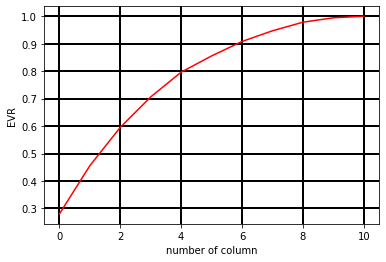

In [22]:
from sklearn.decomposition import PCA
pca  = PCA()
pca.fit_transform(x_train)  ### using PCA for the dataframe (x_train : - x_train data is standardise known as x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), color ='red')
plt.grid(color='black', linestyle='-', linewidth=2)
plt.xlabel('number of column')
plt.ylabel('EVR')
plt.show()

In [23]:
## NOW SEE THE DECOMPOSITION DATA  I.E X_SCALED ( USING PCA TECHNIQUE  : - REMEMBERED  : - CURSE OF DIMENSIONALITY IS HANDLE 
#                                                            BY  PCA)
pd.DataFrame(pca.fit_transform(x_train))

,0,1,2,3,4,5,6,7,8,9,10
0,0.261602,1.168237,0.352697,-0.595539,1.119708,-0.273519,-1.604211,-1.347217,0.431446,-0.478905,-0.756611
1,-1.390551,1.208600,4.840042,-0.395809,-2.279868,1.437186,0.971887,0.057705,0.858284,-0.381521,0.165900
2,1.968122,-1.228150,-0.797543,0.491007,-0.230450,-0.779927,0.005101,-0.623314,-0.084377,-0.009740,0.548005
3,-0.363044,0.133913,-1.517840,-0.015215,-0.729319,0.213370,0.160908,-0.531244,-0.470639,0.567466,0.179532
4,-0.478655,1.856364,-2.333850,-1.360025,2.161976,0.836409,-0.496149,0.217477,0.607463,0.453035,0.107269
...,...,...,...,...,...,...,...,...,...,...,...
1274,-0.183524,-0.944100,-1.682801,-0.076274,-0.232015,0.109373,-0.657668,1.005919,-0.578305,-0.729390,-0.333138
1275,-0.666575,0.612857,0.512082,0.198368,-0.143836,0.364636,-1.039687,0.374461,-0.497146,-0.233586,-0.112721
1276,-1.434576,1.460095,-0.661663,-0.274798,-0.030938,-0.738629,0.109620,-0.295854,0.732781,-0.613358,0.228534
1277,-0.192725,-2.688315,1.515720,0.060115,-0.191524,-0.494461,0.152731,0.501988,0.077916,-0.162956,-0.052328


In [24]:
pca1 = PCA(n_components=7)  ### 7 feature will give maximum variance
x_train = pca1.fit_transform(x_train)

In [25]:
print("shape of the new data", x_train.shape)
print("-"*100)
print("\n")
print(x_train)
print("-"*120)


shape of the new data (1279, 7)
----------------------------------------------------------------------------------------------------


[[ 0.26160217  1.16823653  0.35269731 ...  1.11970781 -0.27351913
  -1.60421088]
 [-1.39055136  1.20859955  4.84004205 ... -2.27986766  1.43718603
   0.97188741]
 [ 1.96812177 -1.22814975 -0.79754341 ... -0.23044976 -0.77992696
   0.00510149]
 ...
 [-1.43457586  1.46009549 -0.66166311 ... -0.03093836 -0.73862919
   0.10962028]
 [-0.19272488 -2.68831466  1.51572001 ... -0.19152388 -0.49446149
   0.15273122]
 [-2.45387629 -3.53213273  1.91135477 ...  0.22476508  1.06460388
   1.0236786 ]]
------------------------------------------------------------------------------------------------------------------------


In [26]:
x_train = pd.DataFrame(x_train  , columns=data.columns[0:7])
print("shape of the data x is : -",x.shape)
x_train.head()

shape of the data x is : - (1599, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
0,0.261602,1.168237,0.352697,-0.595539,1.119708,-0.273519,-1.604211
1,-1.390551,1.208600,4.840042,-0.395809,-2.279868,1.437186,0.971887
2,1.968122,-1.228150,-0.797543,0.491007,-0.230450,-0.779927,0.005101
3,-0.363044,0.133913,-1.517840,-0.015215,-0.729319,0.213370,0.160908
4,-0.478655,1.856364,-2.333850,-1.360025,2.161976,0.836409,-0.496149


In [27]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train ,y_train)

DecisionTreeClassifier()

In [28]:
dt_model.predict(pca1.transform(ss.transform(x_test.iloc[[0]])))

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [29]:
# ss.transform([x_test.iloc[[0]]])
pca1.transform(ss.transform(x_test.iloc[[0]]))

array([[-0.20225745,  0.56847314, -0.75921484,  0.70249691, -0.08339241,
        -0.08948656,  0.34748906]])

In [30]:
dt_model.predict(pca1.transform(ss.transform(x_test.iloc[[0]])))

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [31]:
y_test.iloc[[0]]

803    6
Name: quality, dtype: int64

In [32]:
data.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
data.columns[0:6]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide'],
      dtype='object')

In [34]:
y_pred = dt_model.predict(pca1.transform(ss.transform(x_test)))
y_pred   ######### PREDICTED DATA

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5, 5, 6, 5, 6, 5, 5, 7, 6, 5, 7, 5, 4, 5, 5, 5, 6, 7, 7, 5, 5, 6,
       6, 6, 5, 6, 6, 7, 5, 6, 5, 6, 6, 6, 6, 5, 8, 7, 5, 6, 5, 5, 7, 5,
       7, 6, 5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 6, 5,
       8, 6, 7, 6, 7, 3, 6, 7, 6, 5, 6, 5, 6, 7, 5, 8, 5, 6, 7, 5, 5, 6,
       8, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 6, 3,
       7, 5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 7, 6, 5, 6, 5, 5, 6, 7, 6, 7, 6, 7, 5, 5, 6, 5, 6, 6, 7, 5, 5,
       6, 5, 5, 7, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6,
       6, 5, 6, 8, 5, 6, 6, 6, 5, 7, 4, 6, 7, 5, 7, 7, 5, 6, 6, 5, 7, 6,
       5, 7, 5, 5, 6, 5, 7, 5, 6, 4, 6, 5, 8, 5, 5, 6, 5, 6, 6, 5, 7, 5,
       7, 6, 6, 6, 5, 4, 5, 7, 5, 5, 5, 5, 7, 6, 5, 7, 5, 7, 6, 5, 5, 5,
       7, 7, 6, 7, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 4, 6, 7, 5, 5, 5,
       6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 4, 6, 6, 6, 6, 7, 6, 5, 5, 5, 7,
       5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5,

In [35]:
np.array(y_test)   ### ACTUAL DATA

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [36]:
print("TEST SCORE :-",dt_model.score(pca1.transform(ss.transform(x_test)), y_test)*100)
print("TRAIN SCORE :_",dt_model.score(x_train, y_train)*100)


TEST SCORE :- 59.06249999999999
TRAIN SCORE :_ 100.0


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
print(classification_report(y_test , y_pred))   ### CONFUSIION MATRIX , PRECISION , RECALL , F1-SCORE

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.66      0.68      0.67       130
           6       0.65      0.61      0.63       132
           7       0.40      0.45      0.43        42
           8       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.59      0.59      0.59       320



In [38]:
x_test = pca1.transform(ss.transform(x_test))  ## TRANSFORMING THE X_TEST BY USING THE STANDARD SCALER THEN USING PCA TECHNIQUE
                                                 ### DON'T RUN AGAIN AND AGAIN BECAUSE IT IS USING TRANSFORM METHOD  :-

In [40]:
print_score(dt_model, x_train, y_train, x_test, y_test, train=True)  ## TRAIN RESULT 
print_score(dt_model, x_train, y_train, x_test, y_test, train=False)  ## TEST RESULT


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             3     4      5      6      7     8  accuracy  macro avg  \
precision  1.0   1.0    1.0    1.0    1.0   1.0       1.0        1.0   
recall     1.0   1.0    1.0    1.0    1.0   1.0       1.0        1.0   
f1-score   1.0   1.0    1.0    1.0    1.0   1.0       1.0        1.0   
support    9.0  43.0  551.0  506.0  157.0  13.0       1.0     1279.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support          1279.0  
_______________________________________________
Confusion Matrix: 
 [[  9   0   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   0 551   0   0   0]
 [  0   0   0 506   0   0]
 [  0   0   0   0 157   0]
 [  0   0   0   0   0  13]]

Test Result:
Accuracy Score: 59.06%
_______________________________________________
CLASSIFICATION REPORT:
             3          4           5           6          7 

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
